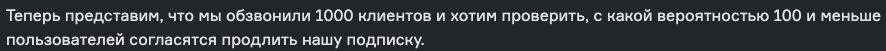

In [5]:
from scipy.stats import binom

In [13]:
sum(binom.pmf(i, 1000, 0.3) for i in range(100 + 1)) #Эта функция делает ровно то же самое, что вы считали на прошлом шаге, но в одну строчку. 
                            # Соответственно, вы можете вместо k перебрать все числа от 0 до 100 включительно и суммировать эти вероятности.
                            #вероятность конкретного количества успехов в биномиальном распределении.

1.718340400329605e-52

In [12]:
binom.cdf(100, 1000, 0.3) # Эта функция показывает, с какой вероятностью случайная величина принимает значение меньшее либо равное указанному. 
                            #То есть тут даже перебирать значения не нужно.

1.7183404003299255e-52

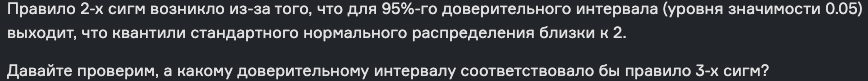

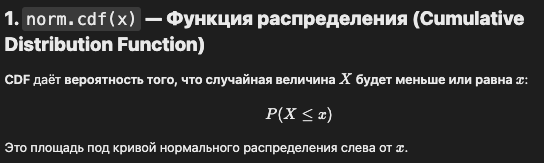

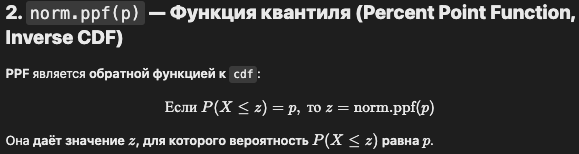

In [18]:
from scipy.stats import norm

z = norm.ppf(0.999) # вычисляет квантиль, соответствующий трём сигмам.
print(z)

interval = norm.cdf(z) - norm.cdf(-z) # вычисляет площадь под нормальной кривой между 3 сигма и - 3 сигма
print(interval)

3.090232306167813
0.998


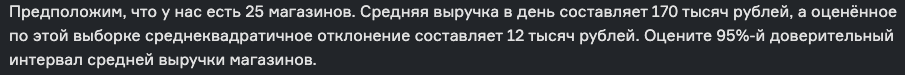

In [21]:
from scipy.stats import t

n = 25
q = 1 - 0.05/2
df = n-1

t_q = t.ppf(q, df) #Распределение стьюдента так как дисперсия неизвестна по ген сов
std = 12
mean = 170

lower_boand = mean - t_q * std / n ** 0.5
upper_boand = mean + t_q * std / n ** 0.5
print(lower_boand, upper_boand)

165.04664345209275 174.95335654790725


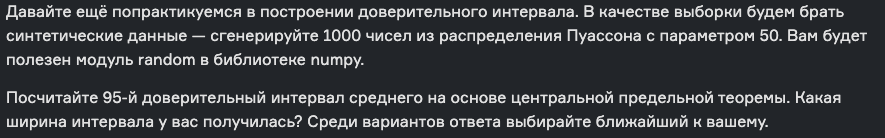

In [27]:
import numpy as np

# Параметр распределения Пуассона
lambda_poisson = 50

# Генерация 1000 случайных чисел
poisson_data = np.random.poisson(lambda_poisson, 1000)

n = 1000
std = np.std(poisson_data)
mean = np.mean(poisson_data)

z_q = norm.ppf(1 - 0.05/2)

lower_boand = mean - z_q * std / n ** 0.5
upper_boand = mean + z_q * std / n ** 0.5

print(lower_boand, upper_boand)

len_interval = (upper_boand - lower_boand)
print(len_interval)

49.649541608315076 50.51645839168492
0.8669167833698452


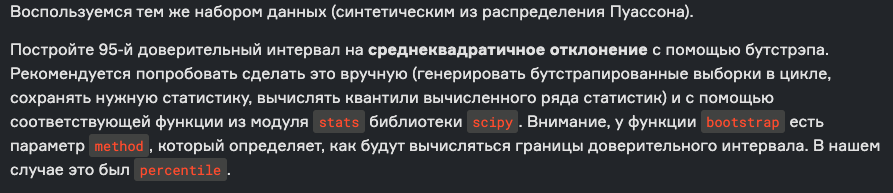

In [30]:
from scipy.stats import bootstrap

boot = bootstrap(data=(poisson_data, ),
                statistic=np.std,
                confidence_level=0.95,
                method='percentile')
print(boot)

BootstrapResult(confidence_interval=ConfidenceInterval(low=6.670760191641249, high=7.3116255917258535), bootstrap_distribution=array([7.16385029, 7.09495025, 6.95949129, ..., 7.25728214, 6.93482343,
       7.05907614]), standard_error=0.16343232745958017)


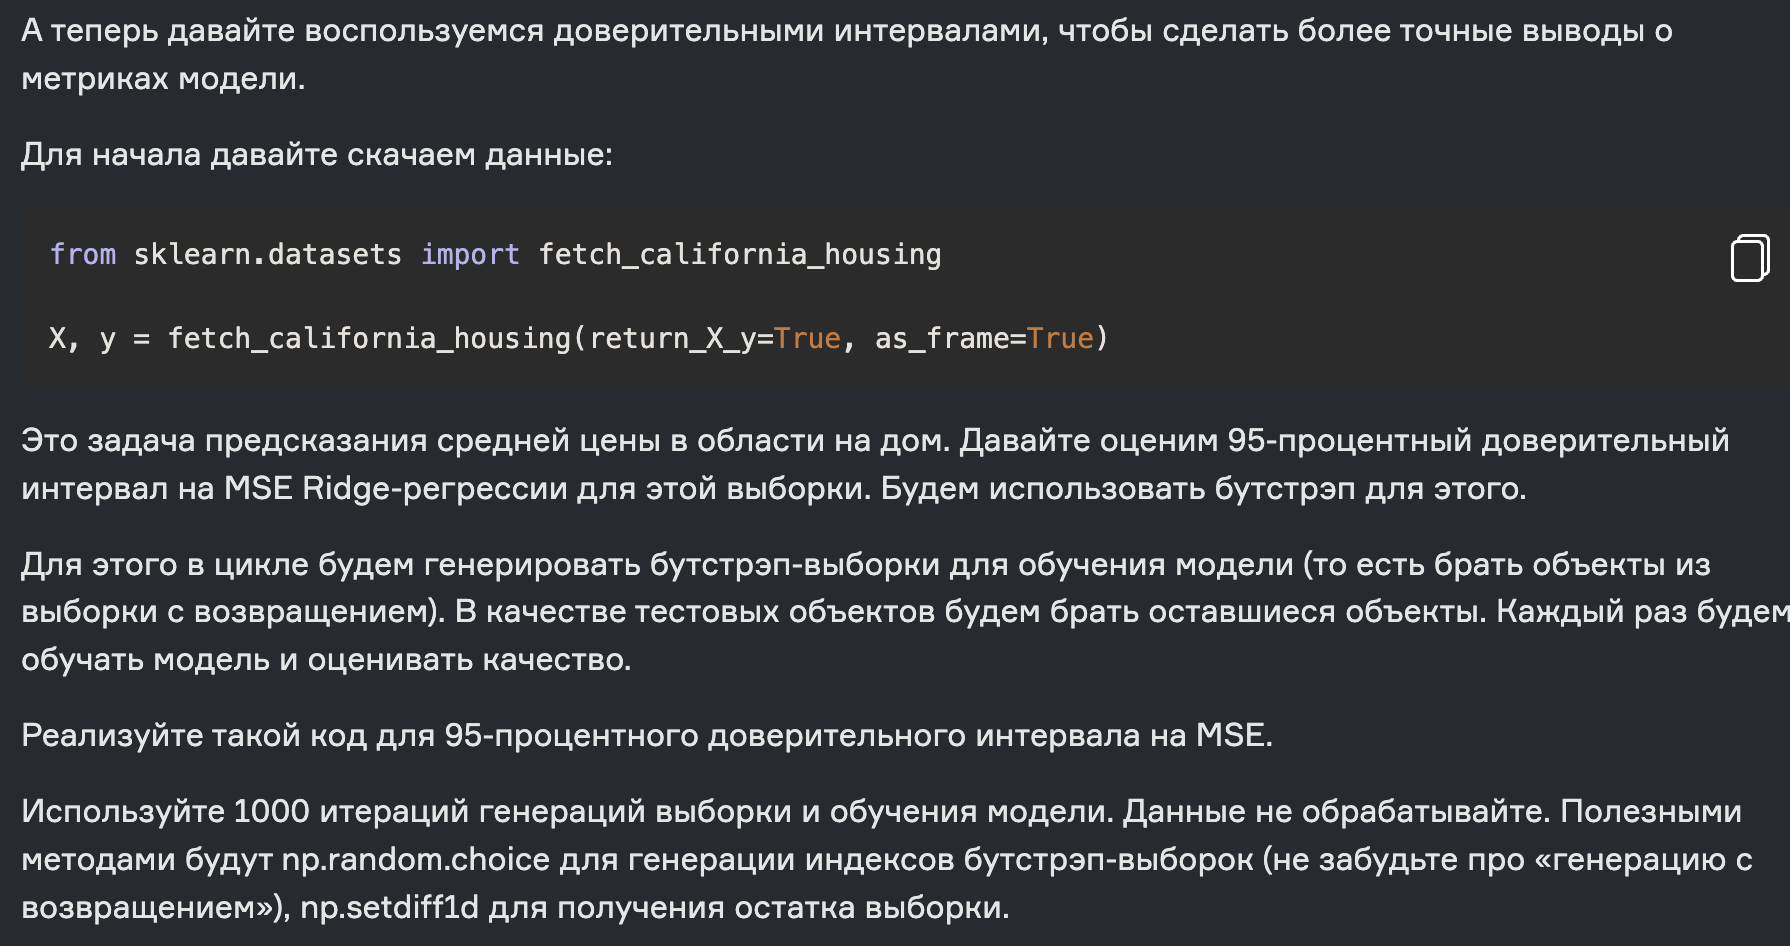

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

X = X.to_numpy()
y = y.to_numpy()

stats = []
n_bootstraping = 1000

for n in range(n_bootstraping):
    train_idx = np.random.choice(len(y), size=len(y), replace=True) 
    test_idx = np.setdiff1d(np.arange(len(y)), train_idx) #Функция np.setdiff1d() возвращает разность массивов, 
                                                            #т. е. элементы из первого массива, которых нет во втором.
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    model = Ridge(alpha=0.1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    stats.append(mse)

np.quantile(stats, [0.025, 0.975])

array([0.50731763, 1.16872269])

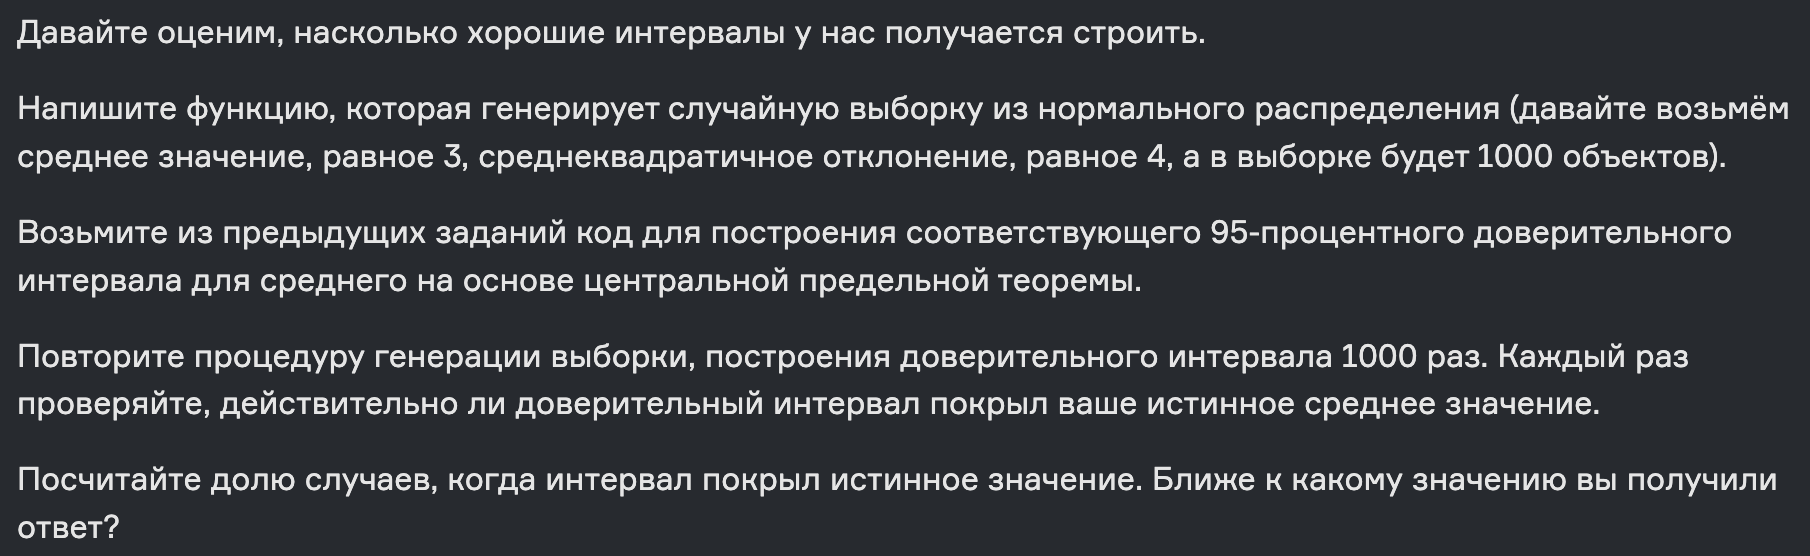

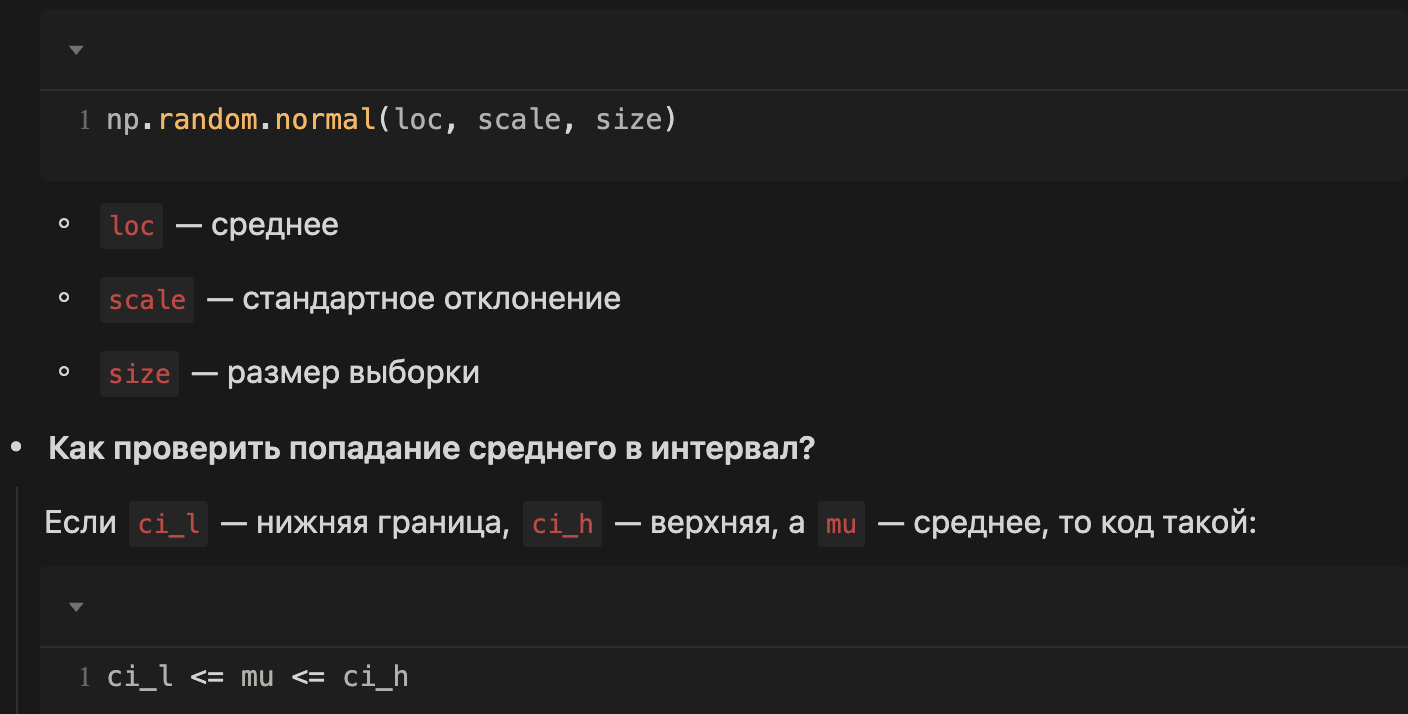

In [45]:
import numpy as np
from scipy.stats import norm

mu_array = []

for i in range(1000):  # 1000 экспериментов
    data = np.random.normal(loc=3, scale=4, size=1000)
    size = len(data)
    std = np.std(data)
    mean = np.mean(data)

    z_q = norm.ppf(1 - 0.05 / 2) 

    lower_bound = mean - z_q * std / np.sqrt(size)
    upper_bound = mean + z_q * std / np.sqrt(size)

    if lower_bound <= 3 <= upper_bound:  # Проверяем истинное среднее
        mu_array.append(1)
        
# Доля случаев, когда интервал покрыл 3
print(f"Доля покрытий: {sum(mu_array) / 1000:.2f}")  


Доля покрытий: 0.95
